<a target="_blank" href="https://colab.research.google.com/github/swghosh/UG-Courses/blob/master/CSE3810/XOR_Problem_using_MLP.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /><br>Run in Google Colab</a>

### Quadrants in a Graph

The x-axis and y-axis of a graph divide the graph into four quadrants.

![Quadrants](https://i.imgur.com/C0ObYq8.png)

# XOR Problem

The XOr, or "exclusive or", problem is a classic problem in ANN research used to evaluate the power of neural networks in finding optimal non-linear decision boundaries. 

| region | x | y | t |
| --- | --- | --- | --- |
| A (Quadrant 3) | -1 | -1 | **-1** |
| B (Quadrant 2) | -1 | +1 | **+1** |
| C (Quadrant 4) | +1 | -1 | **+1** |
| D (Quadrant 1) | +1 | +1 | **-1** |

In this notebook, we explore how to use a multi-layer perceptron (trained using back-propagation algorithm) to solve the XOr problem.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier

Set random seed for deterministic results.

In [2]:
np.random.seed(27)

Generated data points will be in range:
- x: `[-q - offset, q + offset]`
- y: `[-q - offset, q + offset]`

`offset` helps increase the margin of seperation between points. 

PS: `offset` has been experimentally added for better visualisation purpose only.

In [3]:
q = 0.6
offset = 0.1

Generate random X, Y co-ordinates for using with regions A, B, C, D.

In [4]:
ax, ay = np.random.uniform(size=[100,]), np.random.uniform(size=[100,])
bx, by = np.random.uniform(size=[100,]), np.random.uniform(size=[100,])
cx, cy = np.random.uniform(size=[100,]), np.random.uniform(size=[100,])
dx, dy = np.random.uniform(size=[100,]), np.random.uniform(size=[100,])

Region A:
- x: `[-q - offset, 0]`
- y: `[-q - offset, 0]`

In [5]:
ax = (ax * q) - q - offset # [-q, 0]
ay = (ay * q) - q - offset # [-q, 0]

Region B:
- x: `[-q - offset, 0]`
- y: `[0, q + offset]`

In [6]:
bx = (bx * q) - q - offset # [-q, 0]
by = (by * q) + offset     # [0, q]

Region C:
- x: `[0, q + offset]`
- y: `[-q - offset, 0]`

In [7]:
cx = (cx * q) + offset     # [0, q]
cy = (cy * q) - q - offset # [-q, 0]

Region D:
- x: `[0, q + offset]`
- y: `[0, q + offset]`

In [8]:
dx = (dx * q) + offset    # [0, q]
dy = (dy * q) + offset    # [0, q]

Plot the generated data points.

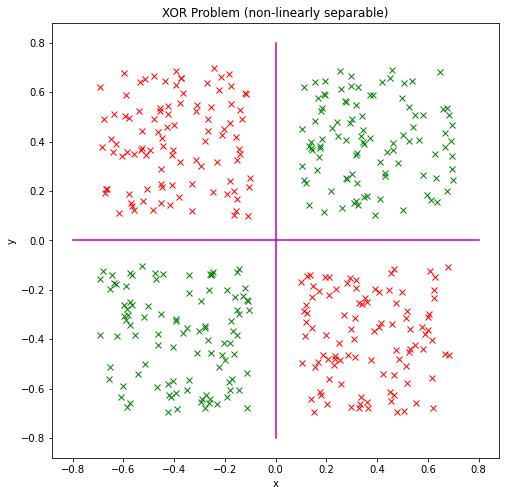

In [9]:
def plot_data():
    plt.plot(ax, ay, 'gx')
    plt.plot(bx, by, 'rx')
    plt.plot(cx, cy, 'rx')
    plt.plot(dx, dy, 'gx')

    plt.plot([-(q + 2 * offset), (q + 2 * offset)], [0, 0], 'm-') # X-axis
    plt.plot([0, 0], [-(q + 2 * offset), (q + 2 * offset)], 'm-') # Y-axis

    plt.xlabel('x')
    plt.ylabel('y')

plt.figure(figsize=(8, 8))
plot_data()
plt.title('XOR Problem (non-linearly separable)')
plt.show()

The data points for regions A, B, C, D.

In [10]:
A = np.array([ax, ay]).T
B = np.array([bx, by]).T
C = np.array([cx, cy]).T
D = np.array([dx, dy]).T

Concatenate data points from regions A, B, C, D into `S`.

In [11]:
S = np.concatenate([A, B, C, D])
print(S.shape)
S

(400, 2)


array([[-0.44456715, -0.13435132],
       [-0.21124976, -0.46487941],
       [-0.25876163, -0.13645582],
       [-0.17919808, -0.4136965 ],
       [-0.46997154, -0.15776397],
       [-0.11232602, -0.241805  ],
       [-0.16408339, -0.45941748],
       [-0.5741709 , -0.65682799],
       [-0.25490341, -0.45785125],
       [-0.30211401, -0.36503586],
       [-0.16791912, -0.36696203],
       [-0.18519237, -0.57392352],
       [-0.25044267, -0.13434903],
       [-0.17791317, -0.32695771],
       [-0.58794649, -0.27577203],
       [-0.50465997, -0.26654661],
       [-0.47623754, -0.13174276],
       [-0.22377218, -0.51299421],
       [-0.60936384, -0.63336396],
       [-0.59803438, -0.26337255],
       [-0.65129854, -0.51148075],
       [-0.51689479, -0.50076143],
       [-0.23002612, -0.66415216],
       [-0.60225629, -0.59050882],
       [-0.65761522, -0.56152209],
       [-0.2793573 , -0.67910741],
       [-0.59141207, -0.32126582],
       [-0.34064965, -0.56548952],
       [-0.45084181,

Targets / class labels are generated for specific regions based on given XOr problem.

In [12]:
at = -1
bt = +1
ct = +1
dt = -1

alabels = np.array([at] * ax.shape[0])
blabels = np.array([bt] * bx.shape[0])
clabels = np.array([ct] * cx.shape[0])
dlabels = np.array([dt] * dx.shape[0])

Class labels for each of the 400 generated data points are stored in `t`.

In [13]:
t = np.concatenate([alabels, blabels, clabels, dlabels])
print(t.shape)
t

(400,)


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

Construct a neural network with:
- 2 nodes in input layer
- 100 nodes in hidden layer (activation used is ReLU)
- 1 node in output layer

PS: `max_iter` has been experimentally set to 1000, default value is 200, which raises convergence warning for this problem.

In [14]:
nn = MLPClassifier(hidden_layer_sizes=(100,),
                   activation='relu',
                   max_iter=1000)
nn.fit(S, t)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Neural network loss at end of training 1000 epochs.

In [15]:
nn.best_loss_ 

0.026151201667467747

Generate a mesh grid for both X, Y co-ordinates over of region:
- x: `[-q - offset, q + offset]`
- y: `[-q - offset, q + offset]`

In [16]:
sx = sy = np.linspace(-q - offset, q + offset, 250)
ux, uy = np.meshgrid(sx, sy)

print('sx_shape: ', sx.shape, '\n', 'sy_shape: ', sy.shape)
print('ux_shape: ', ux.shape, '\n', 'uy_shape: ', uy.shape)

sx_shape:  (250,) 
 sy_shape:  (250,)
ux_shape:  (250, 250) 
 uy_shape:  (250, 250)


Convert the mesh grid matrices into a flat array of 2D points only. 
(for convenience in use with simple scatter plot and NN prediction)

In [17]:
xy = np.vstack([ux.flatten(), uy.flatten()]).T
labels = nn.predict(xy)

Plot complete input space and visualise decision boundaries of MLP.

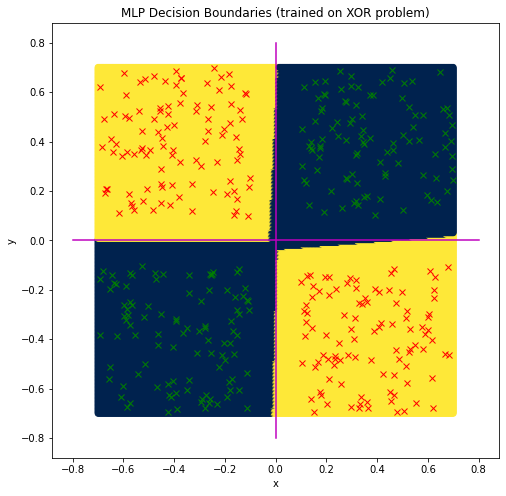

In [18]:
plt.figure(figsize=(8, 8))
plt.scatter(xy[:, 0], xy[:, 1], c=labels, cmap='cividis')
plot_data()
plt.title('MLP Decision Boundaries (trained on XOR problem)')
plt.show()